# Chapter 1 Exercise 7.2

In [70]:
from datetime import datetime
print("Last Updated on: " + str(datetime.now()))

Last Updated on: 2022-04-22 17:09:45.820276


## Problem Statement

**Support Vector Machine for breast cancer diagnosis**
We use the Wisconsin Diagnosis Breast Cancer Database (WDBC) made publicly available by Wolberg, Street, and Mangasarian. 

[Link to data](https://math.gmu.edu/~igriva/book/ch1data.html) Book website.

[wdbc.data](https://math.gmu.edu/~igriva/book/wdbc.data) contains 569 data vectors with 32 components.

[wdbc.names](https://math.gmu.edu/~igriva/book/wdbc.names) gives details about the data.

The first component is the patient number, the second indicates whether the cancer is "malignant" or "benign", and the rest of the components are the observations. 

Use the first 500 data vectors as the training set, use C = 1000, and plot the hyperplane. Predict the classification of the remaining 69 patients. 

## Sklearn Support Vector Machines

We will utilize the sklearn package and use the [SVM](https://scikit-learn.org/stable/modules/svm.html) functionality to find the maximum separating hyperplane.

### Import packages

In [71]:
from sklearn import svm
from sklearn import metrics
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Import & Define Inputs

Let's extract the data, and convert to a pandas dataframe.

In [72]:
data_url = "https://math.gmu.edu/~igriva/book/wdbc.data"
df = pd.read_csv(data_url, header=None)
df[1] = df[1].map({'M': 0, 'B': 1})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next, let's create variables to feed into the svn function. We will separate the point coordinates and classifier information.

In [73]:
features = df.iloc[:500,2:]
label = df.iloc[:500,1]
features_tst = df.iloc[500:,2:]
label_tst = df.iloc[500:,1]

### Model and Fitting

Let's create a linear SVM model, and find the support vectors, and look at the accuracy of the model.

In [74]:
x_test = features.values
y_test = label.values

model = svm.SVC(kernel='linear', C=1000)
model.fit(x_test, y_test)

SVC(C=1000, kernel='linear')

The Support Vecotrs are

In [75]:
model.support_vectors_

array([[1.245e+01, 1.570e+01, 8.257e+01, ..., 1.741e-01, 3.985e-01,
        1.244e-01],
       [1.499e+01, 2.520e+01, 9.554e+01, ..., 2.899e-02, 1.565e-01,
        5.504e-02],
       [1.095e+01, 2.135e+01, 7.190e+01, ..., 1.424e-01, 2.964e-01,
        9.606e-02],
       ...,
       [1.324e+01, 2.013e+01, 8.687e+01, ..., 1.357e-01, 2.845e-01,
        1.249e-01],
       [1.314e+01, 2.074e+01, 8.598e+01, ..., 1.181e-01, 2.563e-01,
        8.174e-02],
       [1.390e+01, 1.924e+01, 8.873e+01, ..., 8.150e-02, 2.356e-01,
        7.603e-02]])

The prediction for the rest of the dataset is

In [76]:
model.predict(features_tst)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

In [77]:
label_tst.values

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
cm = np.array(confusion_matrix(label_tst.values,model.predict(features_tst)))
confusion = pd.DataFrame(cm, index = ['is cancer', 'is healthy'], columns = ['predicted cancer', 'predicted healthy'])
confusion

,predicted cancer,predicted healthy
is cancer,16,1
is healthy,1,51


<AxesSubplot:>

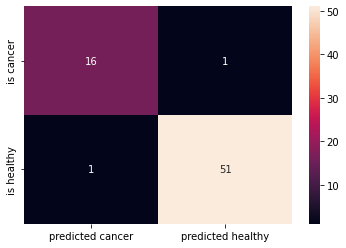

In [80]:
sns.heatmap(confusion,annot=True)

In [81]:
print(classification_report(label_tst.values,model.predict(features_tst)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.98      0.98      0.98        52

    accuracy                           0.97        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.97      0.97      0.97        69



Only 2 events are misclassified. That is less than 3% or the model has 97.1% accuracy.

## References

[1] [Linear and Nonlinear Optimization, Second Edition, Griva et al](https://my.siam.org/Store/Product/viewproduct/?ProductId=1008)

[2] [Support Vector Machines explained with Python examples](https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85)

[3] [Breast Cancer Classification using SVM](https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878)